<a href="https://colab.research.google.com/github/powerbyadu/Repo-1/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction (Housing Dataset)
* Competition name - House Prices - Advanced Regression Techniques
* Objective - Predict the "House Price" based on the variables, The dataset includes 79 variables which includes property attributes, built year, lot area etc..

In [ ]:
# Import necessery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from IPython.display import FileLink

# Load Dataset

In [ ]:
# Read the dataset (train dataset)
df = pd.read_csv("train.csv")
# Viewing the loaded dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Drop Unwanted columns from the Dataset

In [ ]:
print(f"Before dropping Id: {df.shape}")
df = df.drop("Id", axis=1)
print(f"After dropping Id: {df.shape}")
print("Id column removed")

Before dropping Id: (1460, 81)
After dropping Id: (1460, 80)
Id column removed


# Finding the Null values exist in the Dataset

<function matplotlib.pyplot.show(close=None, block=None)>

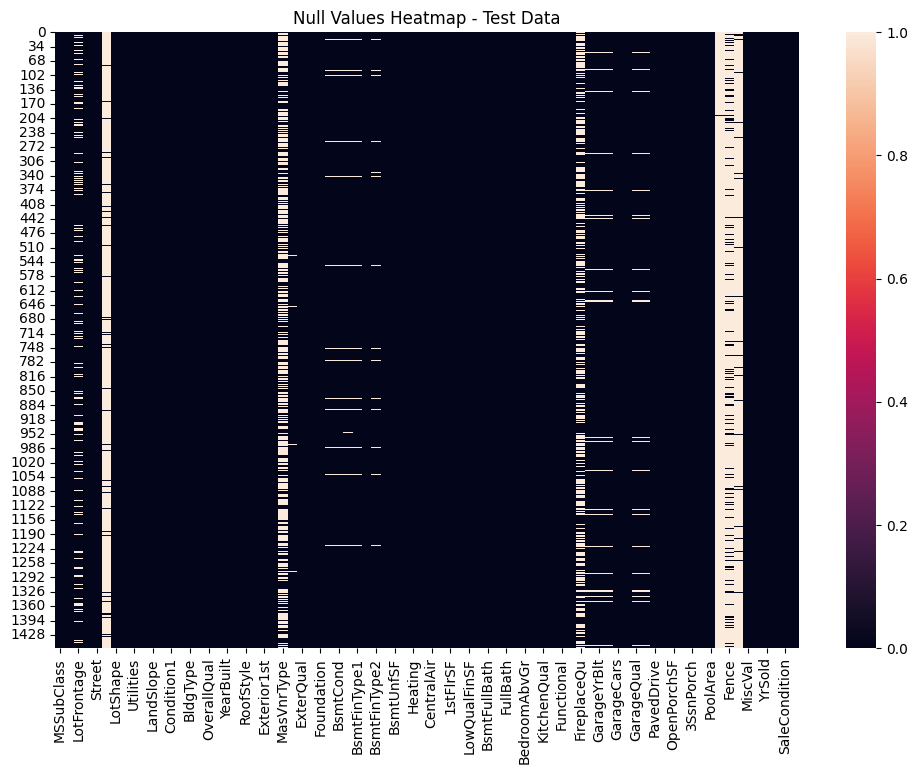

In [ ]:
# Checking the null values in the Dataset
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull())
plt.title("Null Values Heatmap - Test Data")
plt.show

In [ ]:
cat_cols = df.select_dtypes(include=['object','category']).columns
print("\nCategorical columns null values:")
df[cat_cols].isnull().sum()


Categorical columns null values:


MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

# Drop the columns which has higher null values

In [ ]:
drop_columns = ['MiscFeature','PoolQC', 'Alley', 'Fence']
df = df.drop(columns = drop_columns)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


# Define Features and Target variables

In [ ]:
x = df.drop("SalePrice", axis=1)
y = df["SalePrice"]
print(f"Features (X): {x.shape}")
print(f"Target (y): {y.shape}")

Features (X): (1460, 75)
Target (y): (1460,)


# Apply Simple Imputer on the missing Categorical Columns
* SimpleImputer is a tool in the Sklearn which fills missing values in the dataset.
* Here for missing categorical variables I used "Most-frequent" or "Mode" of the remaining column values.
* First, all categorical columns (those with data type object or category) are identified, and then SimpleImputer is applied to fill their missing values.

In [ ]:
# Remove null values in the categorical variables using "Mode" / "Most frequent value"imputer_c = SimpleImputer(strategy = 'most_frequent')
imputer_c = SimpleImputer(strategy='most_frequent')
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
df[cat_cols] = imputer_c.fit_transform(df[cat_cols])
# View the dataframe to check the null values
print("\nCategorical_variables After imputation:")


Categorical_variables After imputation:


# Viewing Numerical Columns

In [ ]:
num_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
if 'SalePrice' in num_cols:
    num_cols.remove('SalePrice')

# Applying SimpleImputer on Numerical Columns
* For the numerical features, the missing values are filled by the "Mean" of each column.

In [ ]:
# Removing null values with mean value
imputer = SimpleImputer(strategy = 'mean')

# Fit and Transform into the model
df[num_cols]=imputer.fit_transform(df[num_cols])

<function matplotlib.pyplot.show(close=None, block=None)>

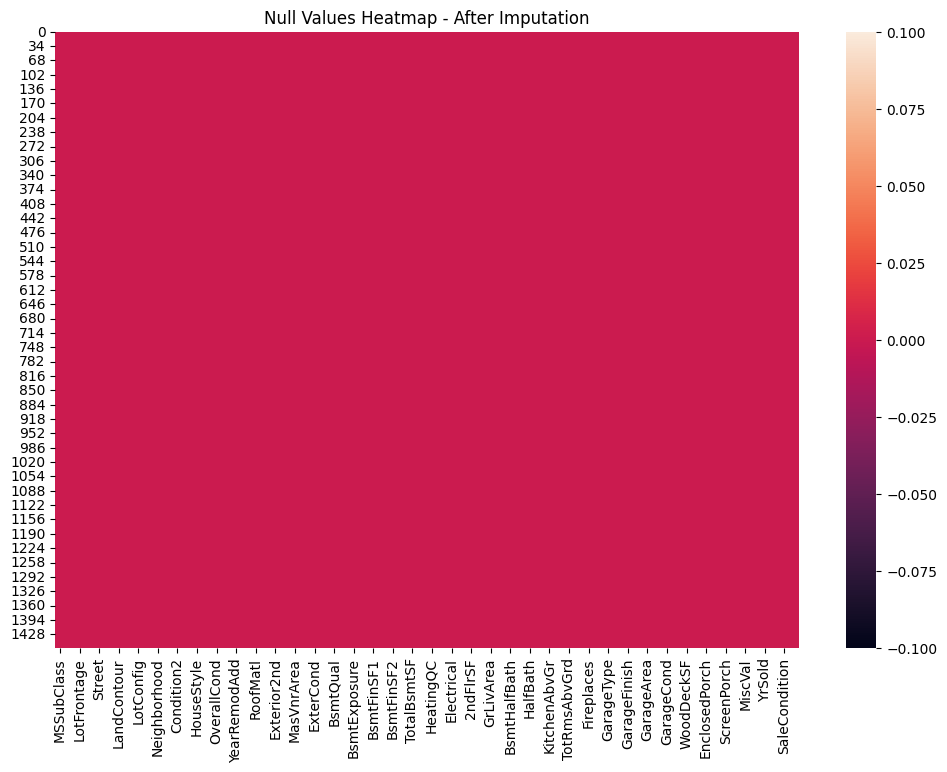

In [ ]:
# Verifying that there is no null values in the Dataset
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull())
plt.title("Null Values Heatmap - After Imputation")
plt.show

# Define Feature and Target Variables

In [ ]:
x = df.drop("SalePrice", axis = 1)
y = df["SalePrice"]

In [ ]:
df.shape

(1460, 76)

# Split Dataset
* test_size = 0.2 (80% of the data used for testing)
* random_state = 0 ensures that every time we run the code, the train–test split remains the same. This removes randomness, so the model produces consistent and reproducible results.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
print(f"Shape of train dataset: ",x_train.shape)
print(f"Shape of test dataset:", x_test.shape)

Shape of train dataset:  (1168, 75)
Shape of test dataset: (292, 75)


# Apply category encoders and coloumn transformer against categorical features

In [ ]:
# Checking the number of unique variables condain in the each features
for cols in cat_cols:
    print(cols, ':' , df[cols].unique(), 'labels')

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH'] labels
Street : ['Pave' 'Grvl'] labels
LotShape : ['Reg' 'IR1' 'IR2' 'IR3'] labels
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS'] labels
Utilities : ['AllPub' 'NoSeWa'] labels
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] labels
LandSlope : ['Gtl' 'Mod' 'Sev'] labels
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] labels
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] labels
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] labels
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] labels
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] labels
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] labels
RoofMatl : ['CompShg' 'WdShn

* Applying OneHotEncoder converts categorical features into numerical values so that machine learning models can process them. Since my dataset contains a mix of categorical and numerical columns, I use ColumnTransformer, which acts as a container holding transformers like OneHotEncoder, SimpleImputer, StandardScaler, etc., and applies each transformer to the specific columns we choose.

* In this case, we apply the OneHotEncoder transformation specifically to the categorical columns listed in cat_cols, converting their category labels into one-hot encoded numerical columns (binary 0 or 1) without affecting the other columns.

* Once the transformation is done, ColumnTransformer creates a single combined output where the one-hot encoded numerical columns and the untouched columns are placed together side-by-side.

In [ ]:
# Apply columnTransformer using One-Hot Encoding
ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols)],remainder='passthrough')
ct

,transformers,"[('onehot', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,False


In [ ]:
x_train.dtypes

MSSubClass       float64
MSZoning          object
LotFrontage      float64
LotArea          float64
Street            object
                  ...   
MiscVal          float64
MoSold           float64
YrSold           float64
SaleType          object
SaleCondition     object
Length: 75, dtype: object

In [ ]:
# Fit and Transform in Training encoded data
x_train_encoded = ct.fit_transform(x_train)
# Tranform testing data
x_test_encoded = ct.transform(x_test)

In [ ]:
print(f"\nFit and Transform in Training encoded data\n{x_train_encoded}")


Fit and Transform in Training encoded data
[[   0.    0.    0. ...    0.    7. 2007.]
 [   0.    0.    0. ...    0.    8. 2009.]
 [   0.    0.    0. ...    0.    8. 2009.]
 ...
 [   0.    0.    0. ...    0.    4. 2010.]
 [   0.    0.    0. ...    0.   10. 2006.]
 [   0.    0.    0. ...    0.    6. 2010.]]


In [ ]:
print(f"\nTransform in Testing encoded data\n{x_test_encoded}")


Transform in Testing encoded data
[[   0.    0.    0. ...    0.    3. 2007.]
 [   0.    0.    0. ...    0.    8. 2006.]
 [   0.    0.    0. ...    0.    7. 2009.]
 ...
 [   0.    0.    0. ...    0.    8. 2007.]
 [   0.    0.    0. ...    0.   12. 2009.]
 [   0.    0.    0. ...    0.    3. 2007.]]


# Apply Random forest Regressor
* We use RandomForestRegressor because the dataset contains many features, and identifying complex patterns manually is impossible. A single decision tree can work for simple or small feature sets, but when many features are involved, Random Forest gives more accurate and stable results. We use the Regressor version because our target variable (SalePrice) is a numerical value.

In [ ]:
rf_r = RandomForestRegressor(n_estimators=200, random_state=42)
rf_r.fit(x_train_encoded, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Predict house prices for the test set

In [ ]:
y_pred = rf_r.predict(x_test_encoded)

In [ ]:
from sklearn.metrics import mean_squared_error

RMSE -  How far the actual values from the predicted values

In [ ]:
rmse = mean_squared_error(y_test, y_pred)**0.5
rmse

33246.33046375462

# Testing the Created Model

In [ ]:
test_df = pd.read_csv("test.csv")
test_ids = test_df["Id"].copy()
test_df = test_df.drop("Id", axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

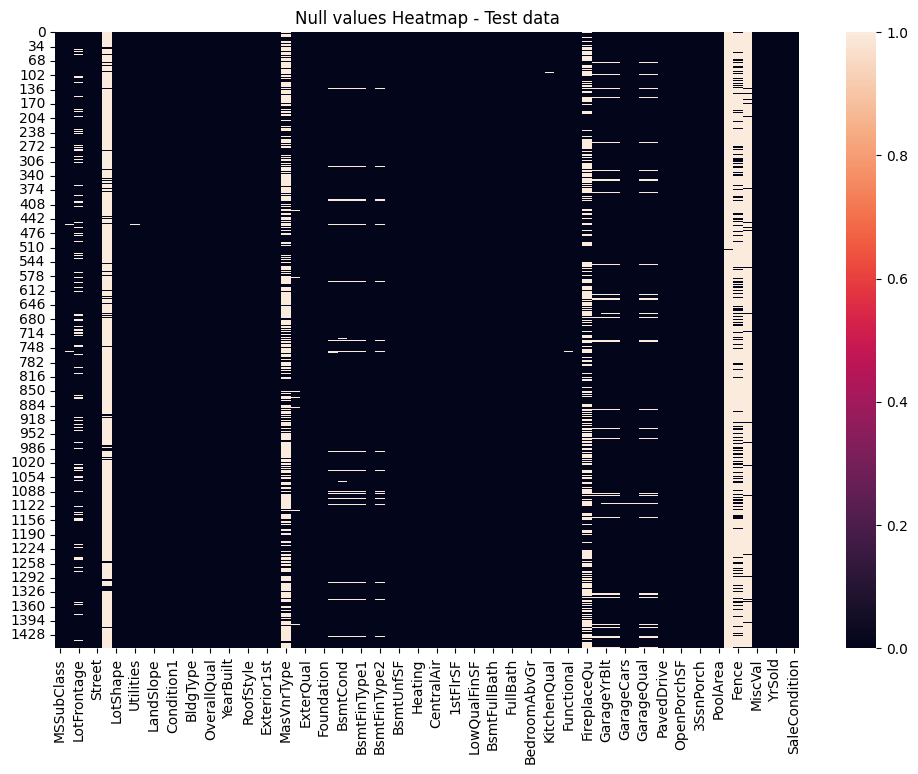

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(test_df.isnull())
plt.title("Null values Heatmap - Test data")
plt.show

In [ ]:
drop_col_test = ['MiscFeature','PoolQC', 'Alley', 'Fence']
test_df = test_df.drop(columns = drop_col_test, errors='ignore')
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [ ]:
# View Categorical columns with null values
cat_col = test_df.select_dtypes(include=['object','category']).columns.tolist()
print("\nTest categorical columns null values:")


Test categorical columns null values:


# Transform using the imputer fitted on training data

In [ ]:
test_df[cat_col] = imputer_c.transform(test_df[cat_col])

In [ ]:
test_df[num_cols] = imputer.transform(test_df[num_cols])

<function matplotlib.pyplot.show(close=None, block=None)>

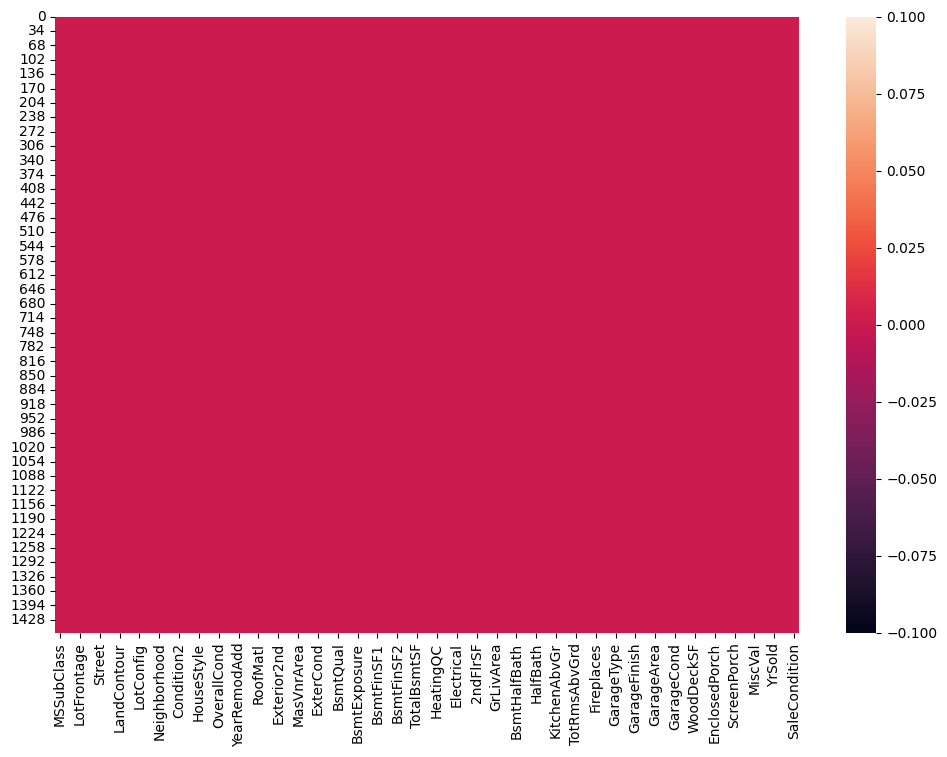

In [ ]:
# Verifying that there is no null values in the Dataset
plt.figure(figsize = (12,8))
sns.heatmap(test_df.isnull())
plt.show

In [ ]:
test_df.shape

(1459, 75)

In [ ]:
num_col_cpy = num_cols.copy()

In [ ]:
test_df[cat_cols] = imputer_c.transform(test_df[cat_cols])
test_df[num_col_cpy] = imputer.transform(test_df[num_col_cpy])

In [ ]:
test_df[num_col_cpy]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,...,470.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,...,506.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0
1455,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,0.0,...,286.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0
1456,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,0.0,...,576.0,474.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0
1457,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,0.0,...,0.0,80.0,32.0,0.0,0.0,0.0,0.0,700.0,7.0,2006.0


In [ ]:
test_encoded = ct.transform(test_df)

In [ ]:
test_pred = rf_r.predict(test_encoded)

In [ ]:

test_pred[10:]

array([202903.13 ,  95150.   ,  97015.25 , ..., 151508.625, 108727.455,
       227284.645], shape=(1449,))

# Applying XG Boost

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,subsample=0.8,colsample_bytree=0.8)
# n_estimator - The XG boost create 100 decision trees and each new trees resolves the mistakes from the previous one.
# learning rate - learning rate over the iteration
# max_depth - Each tree goes maximum 3 level depth
# subsample - each tree choose 80% of the training data in randomly
# colsample_bytree - each tree usine 80% of the feature as random
# Train the model with x train
model.fit(x_train_encoded, y_train)

# Predict the mpodel with test data
predictions = model.predict(x_test_encoded)

# Evaluate the model
predictions = model.predict(x_test_encoded)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

np.float64(29708.649245632154)

In [ ]:
print(test_df.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [ ]:
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": test_pred
})
submission.to_csv("submission.csv", index=False)
print("Submission file for Housing price prediction")
print(submission)

Submission file for Housing price prediction
        Id   SalePrice
0     1461  127905.295
1     1462  155106.900
2     1463  180826.935
3     1464  181986.300
4     1465  198851.900
...    ...         ...
1454  2915   87302.500
1455  2916   87436.715
1456  2917  151508.625
1457  2918  108727.455
1458  2919  227284.645

[1459 rows x 2 columns]


In [ ]:
rmse = mean_squared_error(y_test, y_pred)**0.5
print("\nValidation RMSE:", rmse)
rmse


Validation RMSE: 33246.33046375462


33246.33046375462

In [ ]:
FileLink("submission.csv")

D:\Yadu\Data science\Kaggle Projects\submission.csv

In [ ]:
submission_file = print(submission.to_string(index=False))
submission_file.head(10)

  Id  SalePrice
1461 127905.295
1462 155106.900
1463 180826.935
1464 181986.300
1465 198851.900
1466 184385.860
1467 166524.600
1468 174603.425
1469 183424.350
1470 126034.300
1471 202903.130
1472  95150.000
1473  97015.250
1474 153551.500
1475 142887.540
1476 373266.220
1477 252234.135
1478 300040.990
1479 250360.240
1480 504178.040
1481 301924.925
1482 208051.450
1483 177133.490
1484 174482.985
1485 171783.645
1486 184025.375
1487 312427.765
1488 247027.250
1489 209308.480
1490 200875.970
1491 188828.070
1492  97534.265
1493 184174.645
1494 302206.785
1495 293313.470
1496 226467.515
1497 190623.960
1498 153660.235
1499 152345.735
1500 153253.065
1501 171758.670
1502 160786.570
1503 277353.230
1504 232433.445
1505 214559.280
1506 181566.125
1507 217090.880
1508 204902.760
1509 162885.605
1510 151509.720
1511 151894.250
1512 170993.125
1513 149848.770
1514 163642.120
1515 181601.575
1516 163440.430
1517 152505.360
1518 133296.340
1519 223597.485
1520 138098.600
1521 145490.040
1522 160

AttributeError: 'NoneType' object has no attribute 'head'